# 2014-2016

In [4]:
import pandas as pd

df_2014 = pd.read_csv('./2014-15.csv')
df_2015 = pd.read_csv('./2015-16.csv')

In [38]:
import pandas as pd


def clean_df(df, columns_to_exclude, name):
    columns_to_convert = [col for col in df.columns if col not in columns_to_exclude]

    for col in columns_to_convert:
        try:
            df[col] = df[col].astype(float)
        except ValueError:
            df[col] = df[col].str.replace(',', '.').astype(float)

    # Save the corrected DataFrame to a new CSV file
    df.to_csv(name, index=False)

clean_df(df_2014, ['District', 'Location'], "2014-15_corrected.csv")
clean_df(df_2015, ["Well D","District","Taluka","Location","Type"], "2015-16_corrected.csv")

# 2017

In [5]:
import glob

# Get all the CSV files in the current directory
files = glob.glob('table_data/2017/*.csv')
files

['table_data/2017/output_table_Gujarat_State_Year_Book_2017-18_page_10.csv',
 'table_data/2017/output_table_Gujarat_State_Year_Book_2017-18_page_2.csv',
 'table_data/2017/output_table_Gujarat_State_Year_Book_2017-18_page_3.csv',
 'table_data/2017/output_table_Gujarat_State_Year_Book_2017-18_page_11.csv',
 'table_data/2017/output_table_Gujarat_State_Year_Book_2017-18_page_13.csv',
 'table_data/2017/output_table_Gujarat_State_Year_Book_2017-18_page_1.csv',
 'table_data/2017/output_table_Gujarat_State_Year_Book_2017-18_page_12.csv',
 'table_data/2017/output_table_Gujarat_State_Year_Book_2017-18_page_16.csv',
 'table_data/2017/output_table_Gujarat_State_Year_Book_2017-18_page_4.csv',
 'table_data/2017/output_table_Gujarat_State_Year_Book_2017-18_page_5.csv',
 'table_data/2017/output_table_Gujarat_State_Year_Book_2017-18_page_17.csv',
 'table_data/2017/output_table_Gujarat_State_Year_Book_2017-18_page_15.csv',
 'table_data/2017/output_table_Gujarat_State_Year_Book_2017-18_page_7.csv',
 'tab

In [7]:
df_ls = []

for file in files:
    df_ls.append(pd.read_csv(file))

df_2017 = pd.concat(df_ls, ignore_index=True)
# df_2017['S.No'] = df_2017['S.No'].astype(int)
# df_2017 = df_2017.sort_values(by="S.No")

df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.No      577 non-null    float64
 1   District  578 non-null    object 
 2   Taluka    578 non-null    object 
 3   Location  578 non-null    object 
 4   pH        576 non-null    object 
 5   EC        576 non-null    float64
 6   TDS       574 non-null    float64
 7   TH        574 non-null    float64
 8   Ca        574 non-null    float64
 9   Mg        574 non-null    float64
 10  Na        574 non-null    float64
 11  K         574 non-null    float64
 12  CO3       574 non-null    float64
 13  HCO3      574 non-null    float64
 14  Cl        574 non-null    float64
 15  NO3       574 non-null    float64
 16  SO4       574 non-null    float64
 17  F         574 non-null    float64
 18  Alk       574 non-null    float64
 19  Fe        575 non-null    object 
dtypes: float64(15), object(5)
memory

In [86]:
results = pd.read_csv('refined-data/wqi_results.csv')
(data.shape, results.shape)

((2764, 25), (2764, 3))

In [87]:
data = pd.concat([data, results], axis=1)
data

DISTRICT     TALUKA         LOCATION    PH       EC     TDS      TH  \
0     Ahmedabad    BARWALA          Barvala  8.25   5090.0  3410.0   450.0   
1     Ahmedabad  DHANDHUKA       Dhandhuka1  8.23  14210.0  9521.0  1300.0   
2     Ahmedabad   VIRAMGAM            Endla  8.17    685.0   459.0   220.0   
3     Ahmedabad   VIRAMGAM        Kumarkhan  8.19  10660.0  7142.0   800.0   
4     Ahmedabad     RANPUR          Kundali  8.03   1300.0   871.0   280.0   
...         ...        ...              ...   ...      ...     ...     ...   
2759    Kutchch        NaN         Desalpur  7.42    768.0   515.0   180.0   
2760    Kutchch        NaN  Ratanpar Khadir  7.73   4419.0  2961.0   701.0   
2761    Kutchch        NaN            Rapar   7.6   2942.0  1971.0   400.0   
2762    Kutchch        NaN             Kuda  7.35   1464.0   981.0   410.0   
2763    Kutchch        NaN           Kharoi  7.62   1304.0   874.0   400.0   

         CA     MG      NA  ...     FE  YEAR  WELL NO.    SAR  LATITUDE  \
0      80.0   60.0   937.0  ...  0.033  2017       NaN    NaN       NaN   
1     180.0  207.0  3220.0  ...  0.641  2017       NaN    NaN       NaN   
2      52.0   22.0    49.0  ...      0  2017       NaN    NaN       NaN   
3     140.0  109.0  1875.0  ...  0.082  2017       NaN    NaN       NaN   
4      64.0   29.0   210.0  ...      0  2017       NaN    NaN       NaN   
...     ...    ...     ...  ...    ...   ...       ...    ...       ...   
2759   40.0   19.0    95.0  ...    NaN  2021       NaN   3.08  23.75020   
2760   96.0  112.0   712.0  ...    NaN  2021       NaN  11.70  23.86210   
2761  132.0   17.0   552.0  ...    NaN  2021       NaN  12.00  23.56689   
2762  104.0   36.0   125.0  ...    NaN  2021       NaN   2.68  23.53444   
2763   68.0   56.0   105.0  ...    NaN  2021       NaN   2.28  23.46007   

      LONGITUDE  SIO2   CCME-WQI       WAWQI        EBWQI  
0           NaN   NaN  66.317611   39.480000   307.674635  
1           NaN   NaN  17.470765  136.891889  1273.596754  
2           NaN   NaN  66.157842    8.311444    59.166798  
3           NaN   NaN  30.834894   78.275111   636.263189  
4           NaN   NaN  62.605276   17.196111   151.423300  
...         ...   ...        ...         ...          ...  
2759   70.68102  21.0  60.989717    7.274778    55.265419  
2760    70.3623  21.0  57.180425   34.582556   287.693326  
2761   70.65177  29.0  75.149894   23.527667   196.800919  
2762   70.44038  44.0  87.842858   15.582556   103.042516  
2763   70.35659  21.0  77.998531   13.182667   101.493534  

[2764 rows x 28 columns]

<AxesSubplot:>

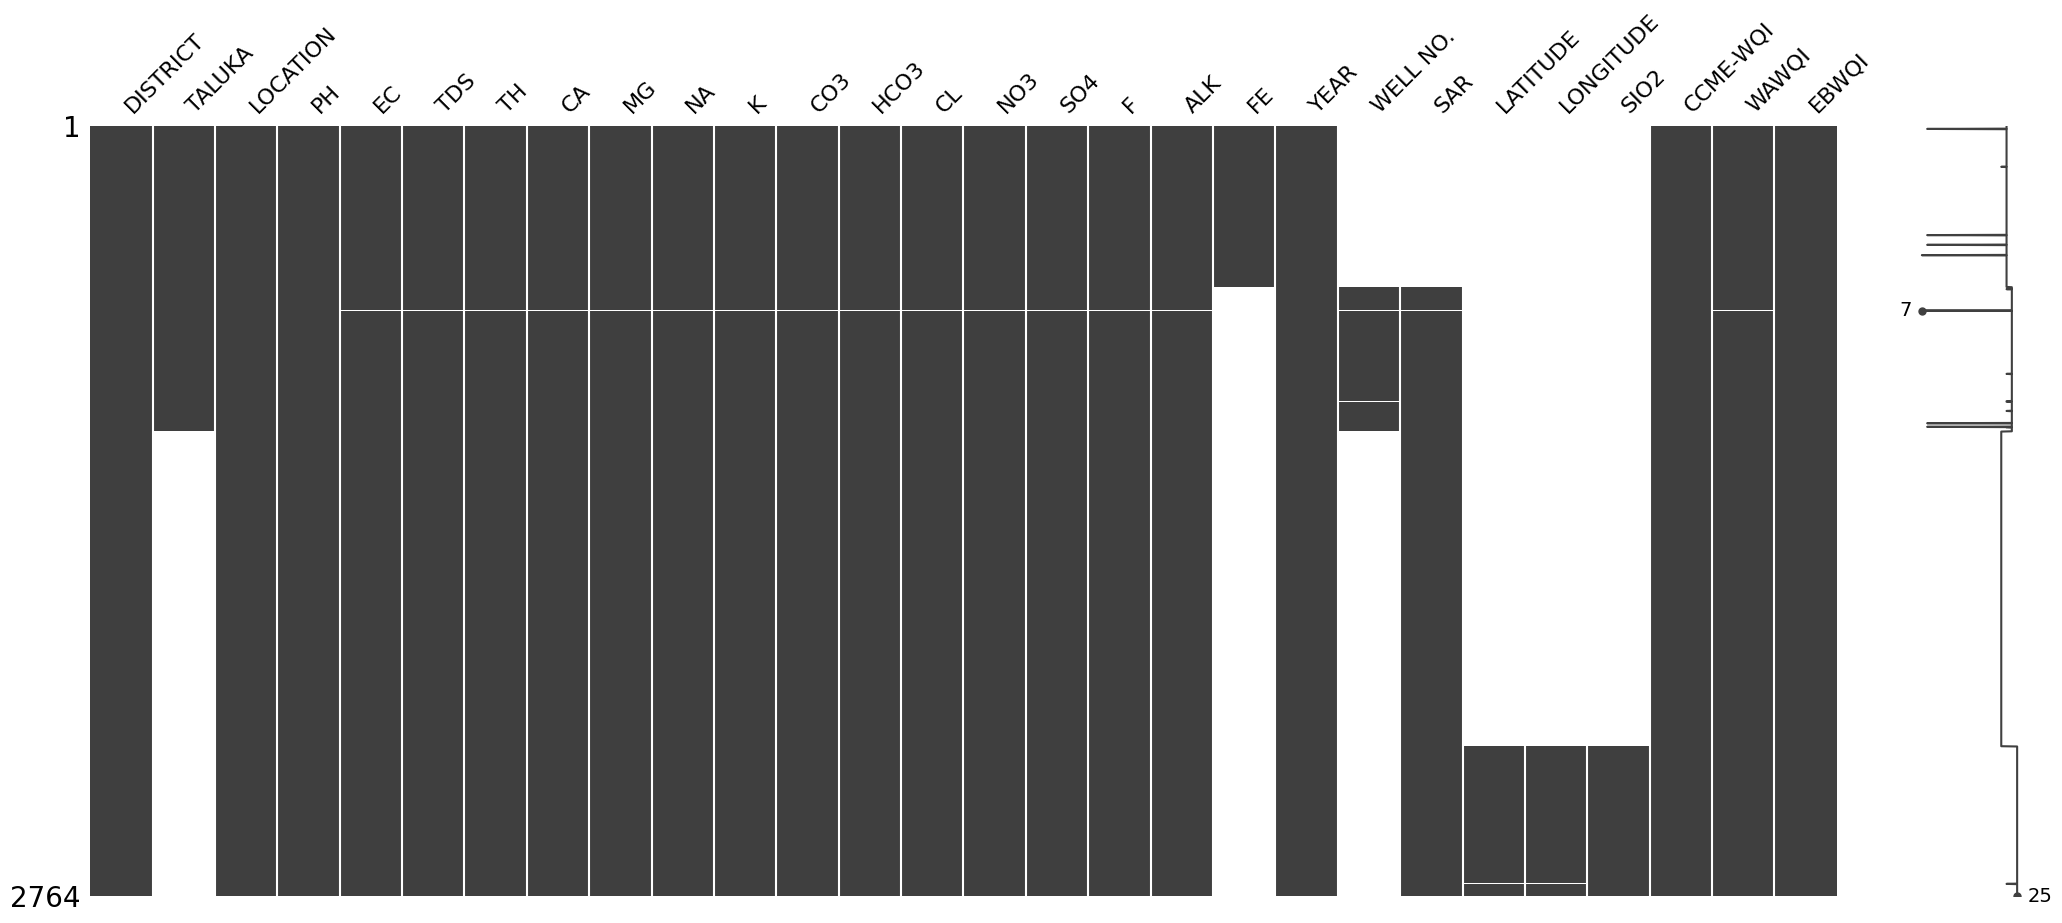

In [88]:
import missingno as mno
mno.matrix(data)

## Spatial Imputation - Might need a complete day to manually clean data

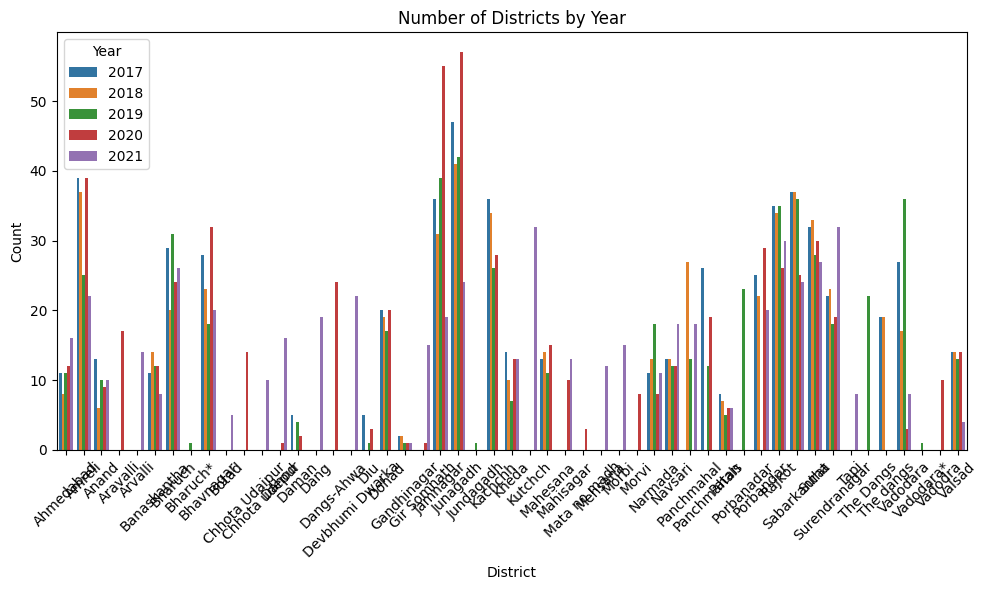

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is already loaded into a DataFrame named 'df'

# Group by 'DISTRICT' and count the occurrences, and also consider 'YEAR' for hue
district_counts = data.groupby(['DISTRICT', 'YEAR']).size().reset_index(name='Count')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='DISTRICT', y='Count', hue='YEAR', data=district_counts)
plt.title('Number of Districts by Year')
plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [90]:
district_counts.columns

Index(['DISTRICT', 'YEAR', 'Count'], dtype='object')

In [91]:
district_counts[district_counts['DISTRICT']=='Ahmedabad']

DISTRICT  YEAR  Count
0  Ahmedabad  2017     11
1  Ahmedabad  2018      8
2  Ahmedabad  2019     11
3  Ahmedabad  2020     12
4  Ahmedabad  2021     16

In [92]:
data[data['DISTRICT']=='Ahmedabad']

DISTRICT     TALUKA      LOCATION    PH       EC       TDS      TH  \
0     Ahmedabad    BARWALA       Barvala  8.25   5090.0   3410.00   450.0   
1     Ahmedabad  DHANDHUKA    Dhandhuka1  8.23  14210.0   9521.00  1300.0   
2     Ahmedabad   VIRAMGAM         Endla  8.17    685.0    459.00   220.0   
3     Ahmedabad   VIRAMGAM     Kumarkhan  8.19  10660.0   7142.00   800.0   
4     Ahmedabad     RANPUR       Kundali  8.03   1300.0    871.00   280.0   
5     Ahmedabad     MANDAL       Mandal2  8.18   4222.0   2829.00   460.0   
6     Ahmedabad     RANPUR       Rajpada  8.11   1094.0    733.00   650.0   
7     Ahmedabad  DHANDHUKA       Tagadi1  8.26   3934.0   2636.00   620.0   
8     Ahmedabad     MANDAL       Ughraj1  8.13   2628.0   1761.00   900.0   
9     Ahmedabad   VIRAMGAM     Viramgam2  8.18   2654.0   1778.00   360.0   
10    Ahmedabad    Barwala         Barla   NaN      NaN       NaN     NaN   
578   Ahmedabad   VIRAMGAM         Endla  7.14    576.0    385.92   190.0   
579   Ahmedabad  DHANDHUKA         Gamph  7.34   2877.0   1927.59   480.0   
580   Ahmedabad   VIRAMGAM     Kumarkhan  7.55   6170.0   4133.90  1200.0   
581   Ahmedabad     RANPUR       Kundali  7.74    820.0    549.40   210.0   
582   Ahmedabad     MANDAL       Mandal2  7.84   2892.0   1937.64   430.0   
583   Ahmedabad     RANPUR       Rajpada  7.63    800.0    536.00   220.0   
584   Ahmedabad   VIRAMGAM     Viramgam2  7.87   4840.0   3242.80  1000.0   
585   Ahmedabad      BAVLA         Bavla  7.19   2593.0   1737.31   240.0   
1096  Ahmedabad        NaN  Ayodhyapuram  8.54   2394.0   1604.00   240.0   
1097  Ahmedabad        NaN       Barvala  8.52   5749.0   3852.00   380.0   
1098  Ahmedabad        NaN         Dalod   8.5  20980.0  14057.00  5750.0   
1099  Ahmedabad        NaN      Devaliya  8.23   2618.0   1754.00   160.0   
1100  Ahmedabad        NaN     Dhandhuka  8.19  14330.0   9601.00  1550.0   
1101  Ahmedabad        NaN         Endla  8.03    755.0    506.00   270.0   
1102  Ahmedabad        NaN         Ghuma  7.57   4245.0   2844.00   750.0   
1103  Ahmedabad        NaN        Kundal  7.96   1951.0   1307.00   190.0   
1104  Ahmedabad        NaN       Rajpara  7.98    679.0    455.00   180.0   
1105  Ahmedabad        NaN        Tagadi  8.12   3430.0   2298.00   800.0   
1106  Ahmedabad        NaN    Vallabipur   8.3   6845.0   4586.00   800.0   
1625  Ahmedabad        NaN         Dalod   8.2  16640.0  11149.00  1451.0   
1626  Ahmedabad        NaN         Endla  7.35    715.0    479.00   280.0   
1627  Ahmedabad        NaN      Viramgam  8.08   2810.0   1883.00   120.0   
1628  Ahmedabad        NaN    Kumar Khan  7.34   6118.0   4099.00   620.0   
1629  Ahmedabad        NaN        Kundal   7.7   1243.0    833.00   210.0   
1630  Ahmedabad        NaN         Bavla  7.48   4998.0   3349.00   550.0   
1631  Ahmedabad        NaN    Dhandhuka1   8.2   7328.0   4910.00   681.0   
1632  Ahmedabad        NaN       Tagadi1   8.1   2960.0   1983.00   550.0   
1633  Ahmedabad        NaN       Barvala  8.19   7338.0   4916.46   380.0   
1634  Ahmedabad        NaN     Lonjdhara  8.18   1264.0    847.00   170.0   
1635  Ahmedabad        NaN       Rajpada  8.08    708.0    474.00   240.0   
1636  Ahmedabad        NaN       Kundali  8.19    735.0    492.00   310.0   
2577  Ahmedabad        NaN         Dalod   7.9  12860.0   8616.00  1290.0   
2578  Ahmedabad        NaN    Dhandhuka1  8.37  12310.0   8248.00  1300.0   
2579  Ahmedabad        NaN         Endla  7.67    713.0    478.00   260.0   
2580  Ahmedabad        NaN         Gamph  7.87    430.0    288.00   140.0   
2581  Ahmedabad        NaN         Ghuma  7.34   4252.0   2849.00   750.0   
2582  Ahmedabad        NaN     Kumarkhan  7.51   9154.0   6133.00   760.0   
2583  Ahmedabad        NaN       Mandal2  8.71   3827.0   2564.00   180.0   
2584  Ahmedabad        NaN       Tagadi1  7.65   1642.0   1100.00   320.0   
2585  Ahmedabad        NaN       Ughraj1  7.65    610.0    409.00   180.0   
258

In [93]:
location_counts = data.groupby(['DISTRICT','LOCATION']).size().reset_index(name='COUNT')
location_counts[location_counts['DISTRICT']=='Ahmedabad']

DISTRICT      LOCATION  COUNT
0   Ahmedabad  Ayodhyapuram      1
1   Ahmedabad         Barla      1
2   Ahmedabad       Barvala      3
3   Ahmedabad         Bavla      2
4   Ahmedabad         Dalod      4
5   Ahmedabad      Devaliya      1
6   Ahmedabad     Dhandhuka      1
7   Ahmedabad    Dhandhuka1      3
8   Ahmedabad         Endla      6
9   Ahmedabad         Gamph      2
10  Ahmedabad         Ghuma      2
11  Ahmedabad          Koth      1
12  Ahmedabad    Kumar Khan      1
13  Ahmedabad     Kumarkhan      3
14  Ahmedabad        Kundal      2
15  Ahmedabad       Kundali      3
16  Ahmedabad     Lonjdhara      1
17  Ahmedabad       Mandal2      3
18  Ahmedabad       Rajpada      3
19  Ahmedabad       Rajpara      1
20  Ahmedabad        Tagadi      1
21  Ahmedabad       Tagadi1      3
22  Ahmedabad       Ughraj1      2
23  Ahmedabad         Vagad      1
24  Ahmedabad    Vallabipur      1
25  Ahmedabad     Vinchhiya      1
26  Ahmedabad      Viramgam      2
27  Ahmedabad     Viramgam2      3

## Temporal Aggregation

In [94]:
# data = data.drop(['LOCATION'], axis=1)
temporal_agg = data.groupby(['DISTRICT','YEAR'])[['EC']].mean()
# temporal_agg.columns = ['DISTRICT','YEAR','EC']
temporal_agg = pd.DataFrame(temporal_agg.to_dict()).reset_index()
temporal_agg.columns=['DISTRICT','YEAR','EC']
temporal_agg

DISTRICT  YEAR           EC
0    Ahmedabad  2017  4647.700000
1    Ahmedabad  2018  2696.000000
2    Ahmedabad  2019  5816.000000
3    Ahmedabad  2020  4404.750000
4    Ahmedabad  2021  5240.625000
..         ...   ...          ...
146     Valsad  2017   871.071429
147     Valsad  2018   825.357143
148     Valsad  2019   674.461538
149     Valsad  2020   607.642857
150     Valsad  2021   550.750000

[151 rows x 3 columns]

In [97]:
# lets use plotly to get interactive plots
import plotly.express as px
fig = px.line(temporal_agg, x='YEAR', y='WAWQI', color='DISTRICT', title='Mean WAWQI by Year')
fig.show()

In [107]:
# lets plot wawqi for district ahmedabad for each year
ahmedabad = data[data['DISTRICT']=='Ahmedabad']
fig = px.scatter(ahmedabad, x='WAWQI', y='EC', title='WAWQI for Ahmedabad by Year', color='YEAR')
fig.show()

In [116]:
# lets plot wawqi vs water quality component plots for each component of the data
components = data.columns
for component in components:
    fig = px.scatter(data, x='WAWQI', y=component, title=f'WAWQI vs {component}', color='YEAR')
    fig.show()


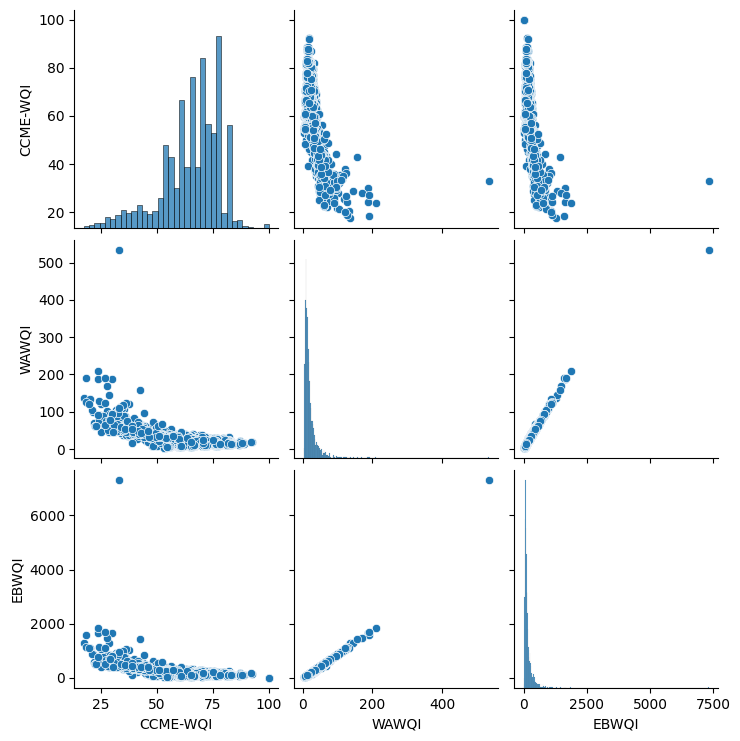

In [119]:
# lets plot pairplot for results dataframe
sns.pairplot(results)

In [ ]:
results.drop(['CCME-log'], axis=1, inplace=True)

In [122]:
import numpy as np

results['CCME-exp'] = results['CCME-WQI'].apply(lambda x: 0 if x==0 else np.power(2, x))
sns.pairplot(results)